# Recognition of American Sign Language via a Leap Motion

*by Matt Hehn, Ben Campbell, & Chris Cochran, December, 2017*

## Introduction

In October 2017, we participated in Colorado State University's Virtual Reality Hackathon. During the 48-hour hackathon, our 4-person team developed a prototype Virtual Reality (VR) experience meant to allow people to learn or practice American Sign Language. Traditionally, learning ASL requires someone already skilled to act as a teacher/tutor to the new learner, which limits the ability of many to learn the language. Additionally, children having to learn ASL as their first language have yet greater difficulties learning the language without another way to convey meaning.

Our project in the hackathon was designed to interpret sign language using a Leap Motion sensor mounted on the front of a VR headset, and provide active feedback to the user as to whether they had accurately mimicked a sign (and what it was, if they succeeed. A visual reference was shown in the VR environment). To aid in first-language learning, the system was designed to be able to enter a 'quiz' demo mode, which would ask the user to sign out a full word, at which point the simulation would spawn in a 3D model of the object the word refers to. We ultimately [won the hackathon](https://source.colostate.edu/sign-language-project-wins-second-annual-ram-hackathon/).

The key limitation of this demo was its accuracy. In the original Unity project, the C# code used to take data from the sensor was making a very naive comparison with a threshhold of allowed difference between a single "good" reference for a sign and the current position of the hand and fingers. Using this method, we were only able to get the prototype to accurately and regularly recognize roughly six letters. 

It was our aim in this project (and even during the hackathon, though time limitations made it impossible) to train a neural network to more accurately recognize and categorize correct signs to then be re-incorporated back into the VR project at some later date.

## Prerequisites/Materials

### Notebook

- Python 3.x
- Numpy
- Pandas
- MatplotLib
- Chuck Anderson's Neural Net package

### Full Project

- Python 3.x 64-bit
    - Must be 64-bit, as the Python LeapMotion API had to be recompiled for use in Python 3 and was recompiled for 64-bit
- Numpy
- Pandas
- Matplotlib
- Chuck Anderson's Neural Net Package
- [Leap Motion Orion 3.2.1 SDK](https://developer.leapmotion.com/releases), Windows version used.
- Leap Motion USB Sensor

## Methods

In order to even begin with structuring and formatting data for implementation with the Neural Network, our work to pull hand data from the sensor had to be ported to the Python version of the sensor SDK's API. Once this was completed, we needed to implement methods to generate and then store data pertaining to hands to a CSV file, with the correct letter/translation of the sign in a row. 

We ultimately stored a unit vector for each bone in the hand that is tracked by the Leap Motion sensor. By default, the vectors are defined in world coordinates for the sensor rather than relative units. To combat this, we re-defined the hand bones in reference to the palm's vector (so that relative hand position in the sensor's FOV would not confound the bone vectors).

At this point, since no dataset we could find online appeared to be in a state we would be able to accurately compare against, we began attempts to generate our own dataset using the script contained in ```HandData.py```. The number of samples for each letter of the alphabet in the data1Normed.csv dataset is listed below.

In [5]:
%run "HandNNetSamples.py"

107 samples in class: 0, sign: a 
78 samples in class: 1, sign: b 
63 samples in class: 2, sign: c 
101 samples in class: 3, sign: d 
50 samples in class: 4, sign: e 
84 samples in class: 5, sign: f 
45 samples in class: 6, sign: g 
66 samples in class: 7, sign: h 
84 samples in class: 8, sign: i 
113 samples in class: 9, sign: j 
84 samples in class: 10, sign: k 
97 samples in class: 11, sign: l 
38 samples in class: 12, sign: m 
67 samples in class: 13, sign: n 
62 samples in class: 14, sign: o 
66 samples in class: 15, sign: p 
109 samples in class: 16, sign: q 
97 samples in class: 17, sign: r 
71 samples in class: 18, sign: s 
71 samples in class: 19, sign: t 
66 samples in class: 20, sign: u 
61 samples in class: 21, sign: v 
70 samples in class: 22, sign: w 
81 samples in class: 23, sign: x 
104 samples in class: 24, sign: y 
38 samples in class: 25, sign: z 


Once we had enough data to begin working with, we set up some methods which would leverage Chuck's Neural Net package and utilities in addition to some of Matt's code from CS440 Assignment 6, which analyzed neural networks given a CSV dataset for use in developing a categorization neural net. This code can be found in ```HandNNet.py``` and the ```Test NNet.ipynb```

The graph from the trained network can be seen below (80/20 split).

In [16]:
%run "HandNNetGraph.py"

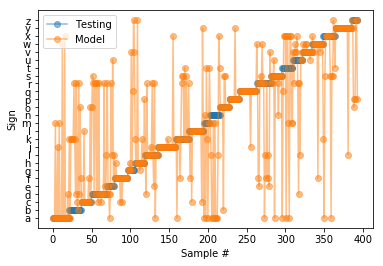

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(Ttest, 'o-', alpha=0.5)
plt.plot(result, "o-", alpha=0.5)

labels = np.unique(data[:, 63])
plt.xlabel("Sample #")
plt.ylabel("Sign")

plt.yticks(np.unique(Ttest).tolist(), np.unique(labels).tolist())

plt.legend(('Testing','Model'), loc='upper left')

### Team Work split:

- Ben Campbell
    - Data Generation
    - Partial report writeup
    - Neural Network configuration testing
- Chris Cochran
    - LOT of Data Generation
    - Neural Network configuration testing
- Matt Hehn
    - Built the Python 3 wrapper for Leap Motion SDK API
    - Ported the handling of the sensor controller
    - Ported and modified hand data normalization and formatting
    - Set up the data-to-csv function
    - Set up the Neural Network interface and training functions 
    - Set up testing python notebook for training and comparing networks
    - A little bit of data generation
    - Part of report writeup

## Results

Show all results.  Intermediate resultw might be shown in above Methods section.  Plots, tables, whatever.

## Conclusions

What I learned.

### References

* [Russell and Norvig, 2014] Stuart Russell and Peter Norvig, [Artificial Intelligence: A Modern Approach](http://aima.cs.berkeley.edu/), Publisher. 2014.
* [Chuck Anderson]
* Leap SDK doc
* 

Your report should contain approximately 1,500 to 5,000 words, in markdown cells.  You can count words by running the following python code in your report directory.

In [19]:
import io
from nbformat import current
import glob
nbfile = glob.glob('*.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

More than one ipynb file. Using the first one.  nbfile= ['ASL Project Report.ipynb', 'Hehn-Proposal.ipynb', 'Test NNet.ipynb']
Word count for file ASL Project Report.ipynb is 842
